In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openbb import obb

In [10]:
# Set your API key
obb.user.credentials.fmp_api_key = "JI198J9ADpdcD2yJ4kd8Zl0RAP1goenk"

# Parameters
symbol = "AAPL"
start_date = "2024-01-01"
short_window = 20
long_window = 50

# Fetch historical data from FMP
data = obb.equity.price.historical(
    symbol=symbol,
    start_date=start_date,
    provider="fmp"
).to_df()

# Set index as datetime
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Use 'close' price
price_col = 'close'

In [11]:
# Compute Moving Averages
data['Short MA'] = data[price_col].rolling(window=short_window).mean()
data['Long MA'] = data[price_col].rolling(window=long_window).mean()

# Generate Signals
data['Signal'] = 0
data['Signal'][long_window:] = np.where(
    data['Short MA'][long_window:] > data['Long MA'][long_window:], 1, -1
)
data['Position'] = data['Signal'].diff()


/var/folders/c9/fh7h3pns0t762031x8s945f80000gp/T/ipykernel_6405/3709965518.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][long_window:] = np.where(
/var/folders/c9/fh7h3pns0t762031x8s945f80000gp/T/ipykernel_6405/370996551

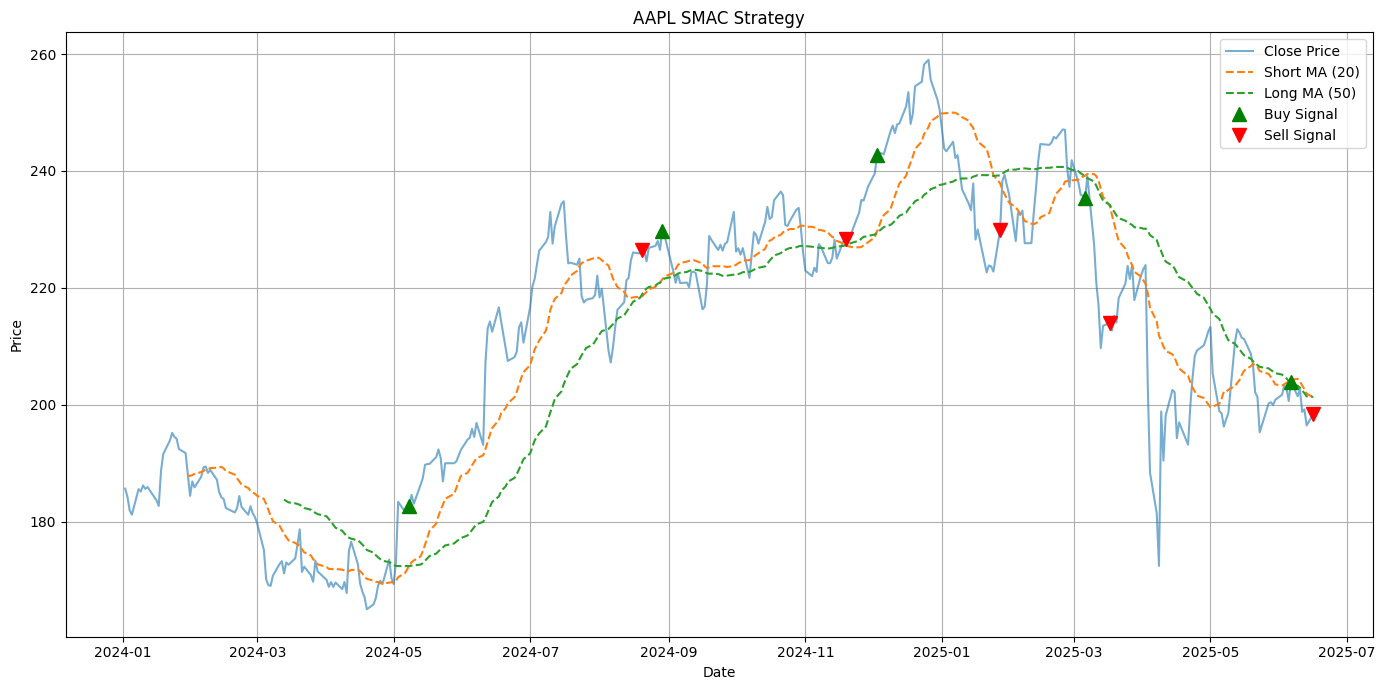

In [12]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[price_col], label='Close Price', alpha=0.6)
plt.plot(data.index, data['Short MA'], label=f'Short MA ({short_window})', linestyle='--')
plt.plot(data.index, data['Long MA'], label=f'Long MA ({long_window})', linestyle='--')

# Buy/Sell Markers
plt.plot(data[data['Position'] == 2].index, data[price_col][data['Position'] == 2], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -2].index, data[price_col][data['Position'] == -2], 'v', markersize=10, color='r', label='Sell Signal')

plt.title(f"{symbol} SMAC Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()